<h3> Ahmed Muhammad Ahmed - TSF - EDA on Retail Company</h3>


<h4> Problem: Determining the weak areas that make the least profit

In [2]:
#Importing libraries 
import pandas as pd

In [3]:
#Reading the data
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

<i> As shown below, The data has no null values which makes the preprocessing easier

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#Statistical info about some columns
df[['Sales', 'Quantity', 'Profit']].describe()

,Sales,Quantity,Profit
count,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,28.656896
std,623.245101,2.225110,234.260108
min,0.444000,1.000000,-6599.978000
25%,17.280000,2.000000,1.728750
50%,54.490000,3.000000,8.666500
75%,209.940000,5.000000,29.364000
max,22638.480000,14.000000,8399.976000


In [7]:
df_negative_profit = df[df['Profit'] < 0]
# Displaying the DataFrame with negative profit values
df_negative_profit[['City', 'State', 'Category', 'Profit']]

,City,State,Category,Profit
3,Fort Lauderdale,Florida,Furniture,-383.0310
14,Fort Worth,Texas,Office Supplies,-123.8580
15,Fort Worth,Texas,Office Supplies,-3.8160
23,Philadelphia,Pennsylvania,Furniture,-1.0196
27,Philadelphia,Pennsylvania,Furniture,-1665.0522
...,...,...,...,...
9920,Bryan,Texas,Office Supplies,-35.8176
9921,Akron,Ohio,Office Supplies,-4.5936
9931,San Bernardino,California,Furniture,-40.1960
9937,Los Angeles,California,Furniture,-1.7772


In [8]:
df_negative_profit

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [9]:
df.duplicated().sum()

17

In [10]:
##Dropping the duplicates
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [18]:
LeastProfit = df[df['Profit'] < 0].sort_values(by='Profit', ascending=True)

#Display the City and categories with least profit
result = pd.DataFrame(LeastProfit[['City','Category','Sub-Category', 'Profit']])
result

,City,Category,Sub-Category,Profit
7772,Lancaster,Technology,Machines,-6599.9780
683,Burlington,Technology,Machines,-3839.9904
9774,San Antonio,Office Supplies,Binders,-3701.8928
3011,Louisville,Technology,Machines,-3399.9800
4991,Chicago,Office Supplies,Binders,-2929.4845
...,...,...,...,...
4660,Philadelphia,Technology,Accessories,-0.3444
7413,Tigard,Furniture,Furnishings,-0.3398
1566,Allen,Technology,Accessories,-0.2685
1496,Coppell,Office Supplies,Storage,-0.2098


(array([0, 1, 2]),
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

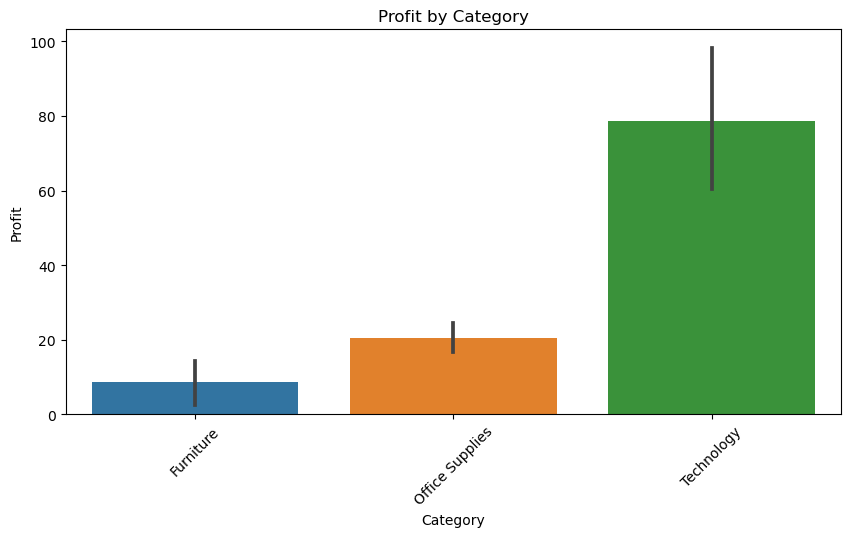

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Profit", data=df)
plt.title("Profit by Category")
plt.xticks(rotation=45)

<i> The figure above shows that The technology is making the most profit

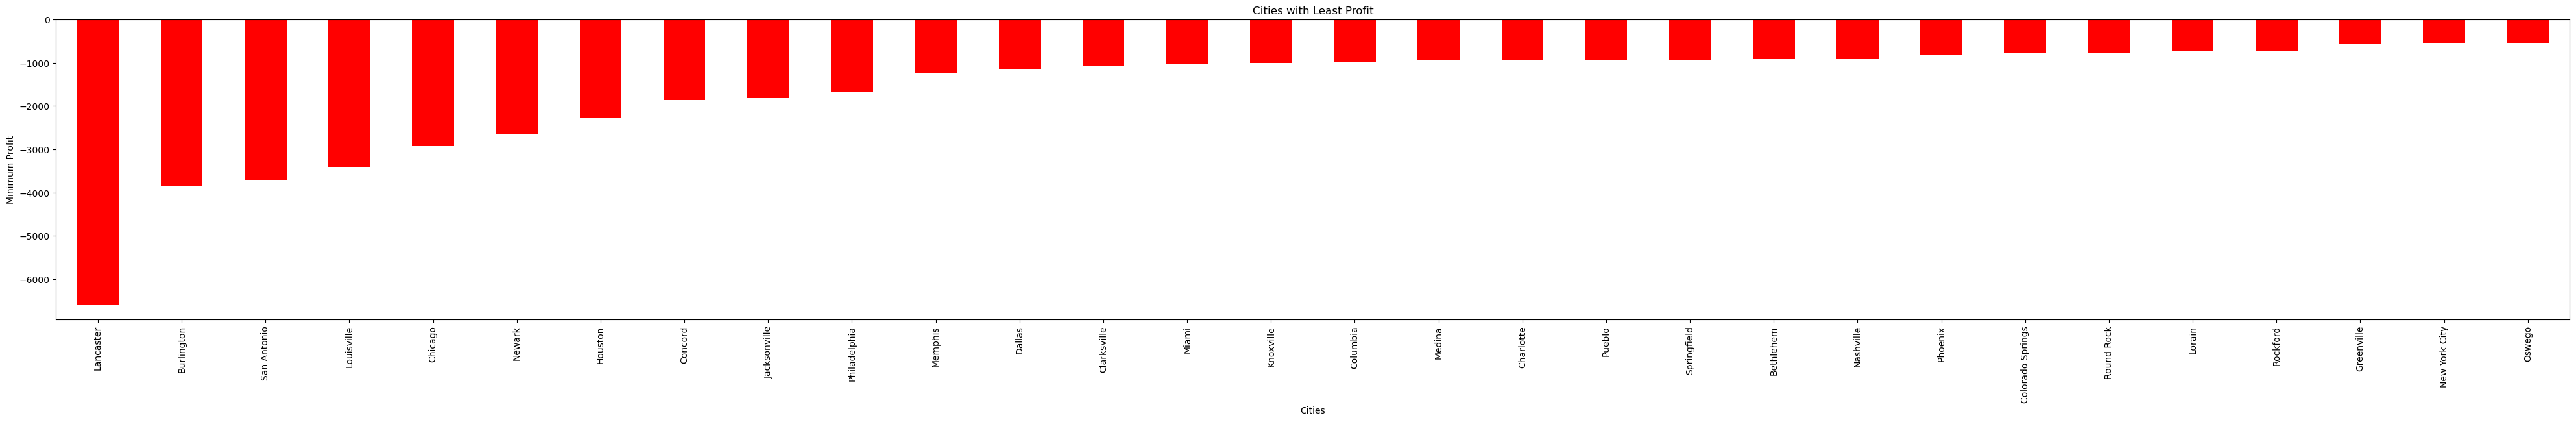

In [32]:
least_profit_cities = df[df['Profit'] < 0].groupby('City')['Profit'].min().sort_values().head(30)


least_profit_cities.plot(kind='bar', color='red', figsize=(50, 6))
plt.xlabel('Cities')
plt.ylabel('Minimum Profit')
plt.title('Cities with Least Profit')
plt.show()

<i> The figure above shows the top 30 cities that are making the least profit.

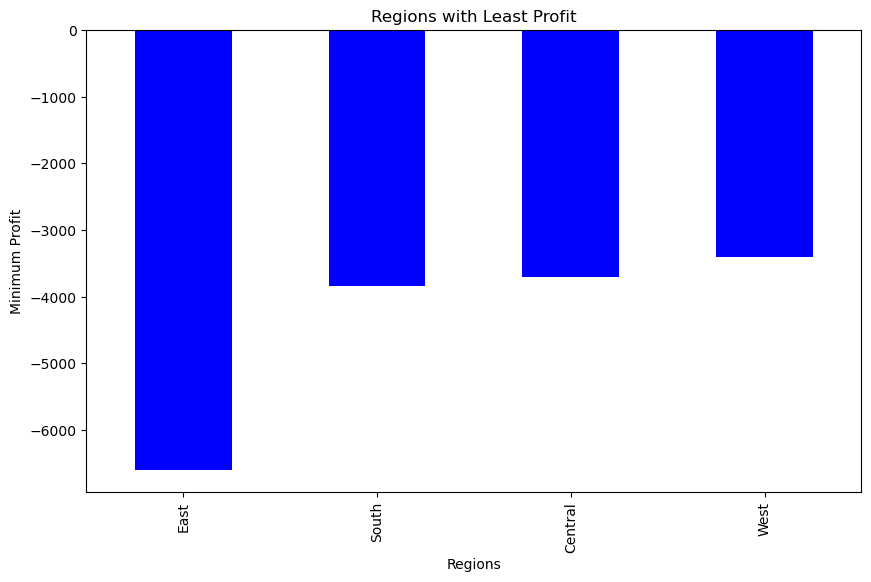

In [34]:
least_profit_regions = df[df['Profit'] < 0].groupby('Region')['Profit'].min().sort_values()

# Plotting
least_profit_regions.plot(kind='bar', color='blue', figsize=(10, 6))
plt.xlabel('Regions')
plt.ylabel('Minimum Profit')
plt.title('Regions with Least Profit')
plt.show()

<i> The figure above shows that the East Region is the region losing the most money.